# 1-deep-learning-from-scratch-pytorch

## Machine learning: classification

State the challenge of classification and give an example of building an ML algo using scikit-learn.

Hit the following points:

* ML algos require both training data *and* an optimization metric
* train test split
* overfitting//underfitting
* data science, ML, and AI consolidate and re-arrange power structures: they're cultural, economic, and social tools, as well as technical tools. Also: who chooses the classification scheme, the columns, the rows?

## Machine Learning: regression

Machine learning where the target is a continuous variable.

# Neural networks

- ML models inspired by biological neural networks.
- Good for image classification, NLP, and more.


![title](../img/george.jpg)

Image from [here](https://www.pnas.org/content/116/4/1074/tab-figures-data).

When making predictions with neural networks, we use a procedure called **forward propagation**. When training neural networks (that is, finding the optimal weights), we use a procedure called **back propogation**. So let's first jump into forward propogation!

## Forward propogation

### Single-layer perceptron

First example is the single layer perceptron (SLP).
The parameters that change when we train the model are the weights.
Check it out on randomly generated data.
The model is $y = w\cdot x + b $ (vectors).
Following image is from [here](https://deepai.org/machine-learning-glossary-and-terms/perceptron) (can make our own or cite this).

![title](../img/perceptron.jpg)

Now it's time to build a single layer perceptron using NumPy:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
x = np.random.rand(5) - 0.5 # one training data point, 5 features/columns
w = np.random.normal(size=5) # weights, one for each feature
b = 0 # bias/offset
y = np.dot(x, w) + b
print(y)

0.22219552227964318


This is a regressor (predicts a contiuous variable). Classically, single layer perceptrons were classifiers. For a classification challenge, you can threshold the output of the regressor by using a step function, for example:

You can also turn it into a logistic regression classifier:

In [4]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

z = int(sigmoid(y) < 0.5)
z

0

### SLP For many data points

This was using a SLP for a single data point. The code generalizes to multiple data points:

In [5]:
# generate more data points
x = np.random.rand(5, 5) - 0.5
# SLP for regression
w = np.random.normal(size=5)
y = np.dot(x, w) + b
y

array([ 1.34352727,  0.14002291,  0.4639285 , -1.37881613, -0.53319245])

In [6]:
#SLP for classification
z = np.sign(y)
z

array([ 1.,  1.,  1., -1., -1.])

In [7]:
# Logreg
z = (sigmoid(y) < 0.5).astype(int)
z

array([0, 0, 0, 1, 1])

### Multilayer perceptron

NNs have hidden layers (between input and output). Lets add one layer to get a multilayer perceptron, such as in the image below! Image from [here](https://www.researchgate.net/figure/A-hypothetical-example-of-Multilayer-Perceptron-Network_fig4_303875065). 

![title](../img/mlp.png)

Notes:
* Each of the 5 node in 1st hidden layer has 4 inputs so it will have a 4 x 5 array for weights
* The output layer has one node and 5 inputs so will have a 5 x 1 array of weights

In [13]:
x = np.random.rand(4) - 0.5 # generate data
w1 = np.random.normal(size=(4, 5)) # weights for hidden layer
w2 = np.random.normal(size=(5, 1)) # weights for output layer
b1 = np.random.normal(size=(1, 5))
b2 = np.random.normal(size=(1, 1))

In [14]:
# MLP classifier
y1 = x @ w1 + b1 # @ is matrix multiplication (generalization of dot product above)
print(y1)
y2 = y1 @ w2 + b2
print(y2)
#g1 = relu(z1)
z = (sigmoid(y2) < 0.5).astype(int)
print(z)

[[ 1.26622449 -0.25878216  0.73934061  0.26629749 -1.22297946]]
[[-0.08505703]]
[[1]]


Notes:
* We've used a sigmoid function in the final layer. "True perceptrons" use a (Heaviside step) function but, generally speaking, if you use other functions, such as a sigmoid, it's still called a multilayer perceptron ([there's more about this here on wikipedia](https://en.wikipedia.org/wiki/Multilayer_perceptron <--- [HBA: find another soruce?));
* Similarly, "true perceptrons" are classifies *but* MLPs, in the more general sense, can also be regressors;
* To build the MLP above, we've essentially just concatenated two linear operations so we still only have a linear regression! If the problem is non-linear, this won't be much use. To deal with non-linearities, we use activation functions. Let's do it!

### Activation functions

Common activation functions are relu, sigmoid, and tanh. We've seen sigmoid. numpy has `np.tanh`. Relu is

In [15]:
def relu(x):
    return np.maximum(0,x)

Let's plot them to get a sense of what they look like:

''

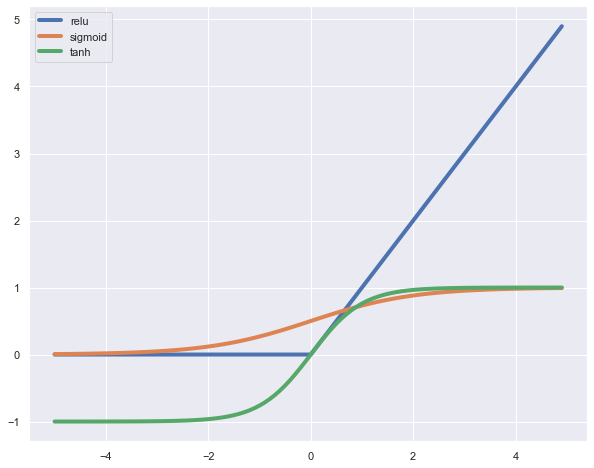

In [38]:
x = np.arange(-5, 5, 0.1)
plt.figure(figsize=(10,8))
plt.plot(x, relu(x), linewidth=4, label="relu");
plt.plot(x, sigmoid(x), linewidth=4, label="sigmoid")
plt.plot(x, np.tanh(x), linewidth=4, label="tanh")
plt.legend(loc="upper left")
;

Use relu MLP now for 10 data points and one hidden layer with 8 nodes:

In [54]:
# for many data points
x = np.random.rand(10, 5) - 0.5
w1 = np.random.normal(size=(5, 8))
w2 = np.random.normal(size=(8, 1))
b1 = np.random.normal(size=(1, 8))
b2 = np.random.normal(size=(1, 1))

In [55]:
# first layer + activation
y1 = x @ w1 + b1
z1 = relu(y1)
z1.shape

(10, 8)

In [56]:
# second layer + activation
z2 = y1 @ w2 + b2
y = np.sign(z2)
print(y)

[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


### Deeper Networks

Now we'll build a regressor with 4 hidden layers (setting $b=0$ throughout to simplify slightly):

In [60]:
x = x = np.random.rand(8, 10) - 0.5
n = 4 # number of hidden layers
weights = {}
for i in range(n):
    #print(f"weights_{i}")
    weights[i] = np.random.normal(size=(10, 10))
weights[n] = np.random.normal(size=(10, 1))
weights[0]

array([[-0.05822971, -1.7573861 , -1.48918817,  0.96923476,  0.10052166,
         2.60904337,  0.38125103,  1.31391605, -0.72222641,  0.29976282],
       [ 0.28467837,  1.19700005, -1.06346356,  1.65484525, -1.07715771,
        -1.54187882, -0.74643155, -1.5547218 , -0.41693378, -1.16462981],
       [-0.22806149, -0.00508999, -0.4974279 , -1.20434856,  0.57023096,
         0.05087187,  0.81701054, -0.96525572, -0.3938501 ,  0.99512997],
       [-0.19220991,  1.1029302 , -0.40099122,  1.00151756,  0.8101894 ,
        -0.36328908,  1.31827381, -0.89526552,  0.96267182, -0.68571489],
       [ 0.25161113, -0.65100628, -0.42320991, -0.7419372 , -1.61891854,
         0.27743691,  0.86739868, -0.62184832, -1.48697453, -0.85509863],
       [-0.36469791,  0.79256014,  2.88695648,  0.11912815,  2.67495302,
        -0.25652362,  0.52355543, -0.6863667 ,  0.56953378,  0.17767295],
       [ 1.24602364,  1.03349918, -0.15050408,  0.41794504,  0.49226045,
         0.00617273, -0.87892299, -1.60743301

In [61]:
# forward propogation
y = relu(x @ weights[0]) # first layer
for i in range(n-1):
    y = relu(y @ weights[i+1]) # hidden layers
y = np.sign(y @ weights[n])  # final layer
print(y)

[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


## Representation learning

* Add some notes // thoughts on forward propogation and representation learning: essentially early layers identify edges, then combinations of edges, then corners, the more complex features, and so on :)

## Back propagation

Back propagation is the algorithm used to optimize the weights of neural networks. Before jumping into back prop, let's first check out how gradient descent can be used to optimize the weights of perceptrons.

## Gradient descent

Now we know how to use forward propogation to make predictions, it's time to think about how to train a neural network! That is, how we determine the best model parameters. Reminder: our NN model parameters are the weights and biases.

We want to minimize the difference between the target variable $y$ and the prediction made by our forward propagation algorithm. So after a forward pass, we use *gradient descent* to change the weights and then do another forward pass and see if we have improved our predictions. Image below from [here](https://www.datasciencecentral.com/profiles/blogs/alternatives-to-the-gradient-descent-algorithm).

![title](../img/gradient-descent.png)

### Gradient Descent and the Single Layer Perceptron

Gradient descent is about optimizing the weights after a round of forward propagation.

![title](../img/perceptron.jpg)

Let's remind ourselves of SLP regressor forward propagation for a single data point:

In [72]:
# write SLP function
def slp(x, w, b):
    y = x @ w + b
    return y

In [73]:
# for single data point
x = np.random.rand(1, 5) - 0.5 # generate data
b = 0
w = np.random.normal(size=5) # initialize weights
y = np.random.normal(10)
y_hat = slp(x, w, b)
print(y_hat)

[0.07577836]


* Discuss how we want to shift each weight slightly in a direction that will improve the prediction *so* we look at how bad the prediction was (prediction minus actual value), take the dot product with the relevant xs, and multiply by the learning rate (which we set and this decides how drastic the changes to the weights will be; an image will help explain this).
* also note that if the prediction is correct, then y_hat - y is zero and there's no change at all.
* note that we're updating all weights simultaneously also

In [74]:
# gradient descent
y_hat = slp(x, w, b)
learning_rate = 0.1
delta_w = learning_rate*((y_hat - y) * x)
delta_b = learning_rate*(y_hat - y) 
#print(delta_w)
w = (w + delta_w).reshape(5)
b = b + delta_b

Let's now see plot the difference between y_hat and y as we alternate between forward prop and updating the weights using gradient descent. Note that a round of forward prop and gradient descent is commonly called an epoch.

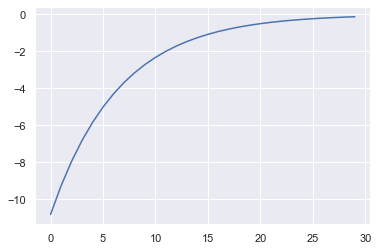

In [75]:
# define some lists to plot y_hat - y as we iterate
n_epochs = 30
diff = list()
for _ in range(n_epochs):
    y_hat = slp(x, w, b)
    diff.append(y_hat - y)
    # gradient descent
    learning_rate = 0.1
    delta_w = learning_rate*((y_hat - y) * x)
    delta_b = learning_rate*(y_hat - y) 
    #print(delta_w)
    w = (w - delta_w).reshape(5)
    b = b - delta_b
    #print(y_hat - y)
plt.plot(diff);

Let's now perform the same but for many data points! Instead of plotting the difference (which will be an array/vector), we'll plot the dot product of the difference with itself, which is a measure of distance [say more on this, HBA].

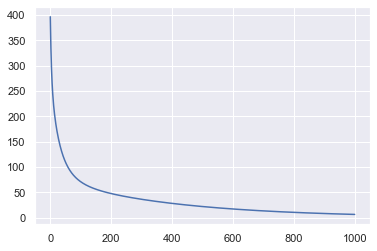

In [89]:
# many data points
x = np.random.rand(5, 5) - 0.5
w = np.random.normal(size=5)
b = 0.1
diff = list()
for _ in range(1000):
    y_hat = slp(x, w, b)
    diff.append((y_hat - y)@(y_hat - y))
    learning_rate = 0.1
    delta_w = learning_rate*((y_hat - y) @ x)
    #print(delta_w)
    w = (w - delta_w).reshape(5)
plt.plot(diff);

## Back propagation

In [20]:
# https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
# https://machinelearningmastery.com/neural-networks-crash-course/
# https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/